imports

In [13]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.ticker as mtick

consts

In [14]:
brute_color = 'orange'
prune_color = 'blue'
probe_color = 'darkgreen'
timeout_color = 'red'
ate_range_color = 'pink'
prune_marker = 'x'
probe_marker = 'o'
marker = 'X'

doublefig_width = 7
doublefig_height = 6

plt.rcParams.update({'font.size': 22})
FONT_SIZE = 22
MARKER_SIZE = 10
TIMEOUT_VAL = 14400

helper functions

In [15]:
def plot_with_std(ax, x, y_runs, color, marker, label=None):
    x_filtered = []
    means = []
    stds = []

    for xi, runs in zip(x, y_runs):
        if runs is None:
            continue
        y = np.array(runs)
        x_filtered.append(xi)
        means.append(y.mean())
        stds.append(y.std())

    x_filtered = np.array(x_filtered)
    means = np.array(means)
    stds = np.array(stds)

    line, = ax.plot(
        x_filtered,
        means,
        color=color,
        marker=marker,
        ms=MARKER_SIZE,
        label=label
    )

    ax.fill_between(
        x_filtered,
        means - stds,
        means + stds,
        color=color,
        alpha=0.2
    )

    return line

def extract_exp_data(filepath, exp_number, only_success=True):
    """
    Reads experiment sheet and returns runtime lists for given EXP number.

    Parameters:
        filepath (str)       : path to Excel file
        exp_number (int)     : experiment number (e.g., 17 for EXP17.*)
        only_success (bool)  : filter rows where status == 'success'

    Returns:
        x_values (sorted list)
        runtime_probe (list of lists)
        runtime_prune (list of lists)
    """

    # Read Excel file
    df = pd.read_csv(filepath)

    # Optional: keep only successful runs
    if only_success and 'status' in df.columns:
        df = df[df['status'].str.lower() == 'success']

    # Keep only this EXP number (EXP17.*)
    df = df[df['EXP'].str.startswith(f'EXP{exp_number}.')]

    # Extract data size (the number after dot)
    df['data_size'] = df['EXP'].str.split('.').str[1].astype(int)

    # Sort by data size
    df = df.sort_values('data_size')

    # Get sorted unique x values
    x_values = sorted(df['data_size'].unique())

    runtime_probe = []
    runtime_prune = []

    for x in x_values:
        df_x = df[df['data_size'] == x]

        # Probe runs
        probe_times = df_x[df_x['TYPE'].str.lower() == 'probe']['time'].tolist()

        # Prune runs
        prune_times = df_x[df_x['TYPE'].str.lower() == 'prune']['time'].tolist()

        runtime_probe.append(probe_times if probe_times else None)
        runtime_prune.append(prune_times if prune_times else None)

    return x_values, runtime_prune, runtime_probe


plots:

number of confunders VS run time

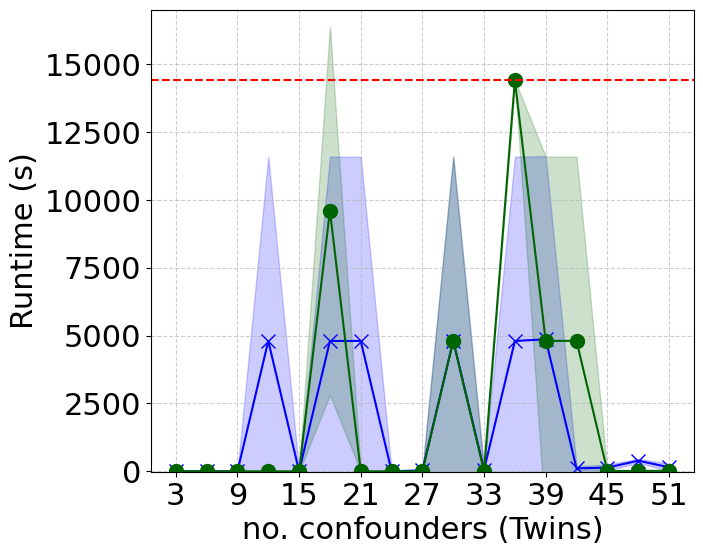

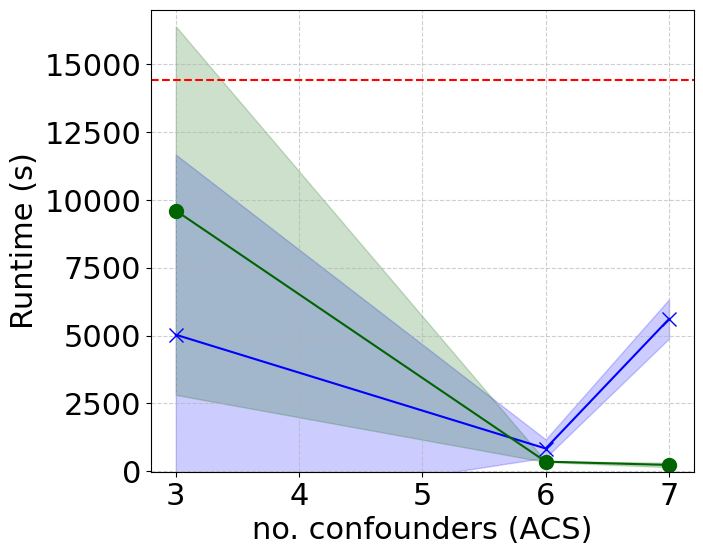

In [16]:
x_num_confunders_twins = [i for i in range(3, 52, 3)]
x_num_confunders_acs = [3, 6, 7]

# -------------------------
# Y values — NOW list of runs per x
# Put None if no data
# -------------------------

y_runtime_prune_twins =  [[0.0012869834899902, 0.0010881423950195, 0.0028133392333984],
  [0.0031886100769042, 0.0013837814331054, 0.0013787746429443],
  [0.0060234069824218, 0.0043752193450927, 0.0046408176422119],
  [0.5256319046020508, 3.287216186523437, TIMEOUT_VAL],
  [0.0061128139495849, 8.690136671066284, 0.0059773921966552],
  [0.0073142051696777, 0.0031723976135253, TIMEOUT_VAL],
  [0.0038795471191406, 1.8275399208068848, TIMEOUT_VAL],
  [13.126994609832764, 0.0067977905273437, 0.0036683082580566],
  [95.85017085075378, 0.0075020790100097, 0.0042726993560791],
  [0.0050201416015625, 40.0792760848999, TIMEOUT_VAL],
  [0.004732608795166, 18.08936095237732, 151.69064116477966],
  [0.0092213153839111, 0.0060169696807861, TIMEOUT_VAL],
  [TIMEOUT_VAL, 0.0055890083312988, 185.79978322982788],
  [0.00923752784729, 151.73242115974426, 172.45041298866272],
  [290.20455527305603, 16.87090563774109, 99.25088381767272],
  [486.2209193706513, 365.236695766449, 321.43102645874023],
  [123.40713429450987, 323.4696471691132, 5.054216623306274]]

y_runtime_probe_twins =  [[0.007, 0.008, 0.003],
  [0.003, 0.003, 0.003],
  [0.004, 0.004, 0.007],
  [0.005, 0.006, 1.298],
  [0.005, 0.005, 0.005],
  [TIMEOUT_VAL, TIMEOUT_VAL, 0.006],
  [0.01, 0.006, 0.007],
  [4.751, 0.007, 0.006],
  [0.011, 0.007, 0.008],
  [7.412, TIMEOUT_VAL, 7.018],
  [9.066, 0.007, 0.008],
  [TIMEOUT_VAL, TIMEOUT_VAL, TIMEOUT_VAL],
  [11.183, 0.026, TIMEOUT_VAL],
  [0.011, TIMEOUT_VAL, 12.248],
  [14.582, 0.012, 14.802],
  [13.401, 16.771, 16.926],
  [17.813, 17.365, 18.37]]

y_runtime_prune_acs = [[0.1193478107452392, TIMEOUT_VAL, 691.5070588588715],
  [364.9010443687439, 1089.8784816265106, 1064.035825252533],
  [4587.870975494385, 6126.683455705643, 6114.801123857498]]

y_runtime_probe_acs =  [[3.789, TIMEOUT_VAL, TIMEOUT_VAL], [344.1, 376.867, 349.312], [175.134, 175.688, 351.447]]

# -------------------------
# Plotting
# -------------------------

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots() #1, 2, figsize=(12, 5))
fig1.set_figheight(doublefig_height)
fig1.set_figwidth(doublefig_width)
fig2.set_figheight(doublefig_height)
fig2.set_figwidth(doublefig_width)

# ---- Twins ----
line1 = plot_with_std(ax1, x_num_confunders_twins, y_runtime_prune_twins, prune_color, prune_marker, "TAPS-OE")
plot_with_std(ax1, x_num_confunders_twins, y_runtime_probe_twins, probe_color, probe_marker)

ax1.set_xticks(np.arange(3, 52, 6))
ax1.set_xlabel("no. confounders (Twins)")
ax1.grid(True, linestyle='--', alpha=0.6)

# ---- ACS ----
plot_with_std(ax2, x_num_confunders_acs, y_runtime_prune_acs, prune_color, prune_marker)
line2 = plot_with_std(ax2, x_num_confunders_acs, y_runtime_probe_acs, probe_color, probe_marker, "TAPS-Probe")

ax2.set_xlabel("no. confounders (ACS)")
ax2.set_xticks(np.arange(3, 8, 1))
ax2.grid(True, linestyle='--', alpha=0.6)

ax1.axhline(y=TIMEOUT_VAL, color=timeout_color, linestyle='--', linewidth=1.5)
ax2.axhline(y=TIMEOUT_VAL, color=timeout_color, linestyle='--', linewidth=1.5)
# ---- Shared labels ----
# fig.text(0.04, 0.5, 'Run Time - sec', va='center', rotation='vertical', fontsize=FONT_SIZE)
# fig.text(0.5, 0.04, 'number of confunders', ha='center', fontsize=FONT_SIZE)
ax1.set_ylabel('Runtime (s)')
ax2.set_ylabel('Runtime (s)')

ax1.set_ylim(-15,17000)
ax2.set_ylim(-15,17000)


# fig.legend(
#     handles=[line1, line2],
#     loc='lower center',
#     bbox_to_anchor=(0.1, -0.05),
#     frameon=False
# )

# plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.subplots_adjust(left=0.15, wspace=0.3)

fig1.savefig(f'twins-time-vs-confounders.pdf', bbox_inches="tight", dpi=600)
fig2.savefig(f'acs-time-vs-confounders.pdf', bbox_inches="tight", dpi=600)

C:\Users\hila\AppData\Local\Temp\ipykernel_38044\1683986262.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  figlegend.savefig(f'freefloating-legend.pdf', bbox_inches="tight", dpi=600)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


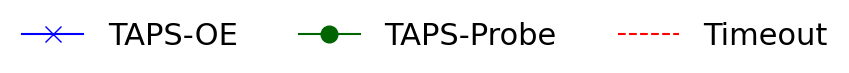

In [53]:
# detached legend

def discard_legend():
    from matplotlib.lines import Line2D
    figlegend,ax = plt.subplots()
    figlegend.set_figwidth(10)
    figlegend.set_figheight(0.1)
    figlegend.set_tight_layout(True)
    ax.set_axis_off()
    handles = []
    # for color,label in zip([prune_color,probe_color,'red'],["TAPS-OE","TAPS-Probe",'Timeout']):
    #     handles.append(mpatches.Patch(label=label,color=color,linestyle=))
    handles.append(Line2D([],[],label='TAPS-OE',color=prune_color,linestyle='-',marker=prune_marker,ms=12))
    handles.append(Line2D([],[],label='TAPS-Probe',color=probe_color,linestyle='-',marker=probe_marker,ms=12))
    handles.append(Line2D([],[],label='Timeout',color=timeout_color,linestyle='--'))
    #figlegend.legend([None,None,None,None],)
    figlegend.legend(handles=handles,ncol=3, frameon=False,loc='center')
    figlegend.savefig(f'freefloating-legend.pdf', bbox_inches="tight", dpi=600)
discard_legend()

number of dataset duplications vs run time

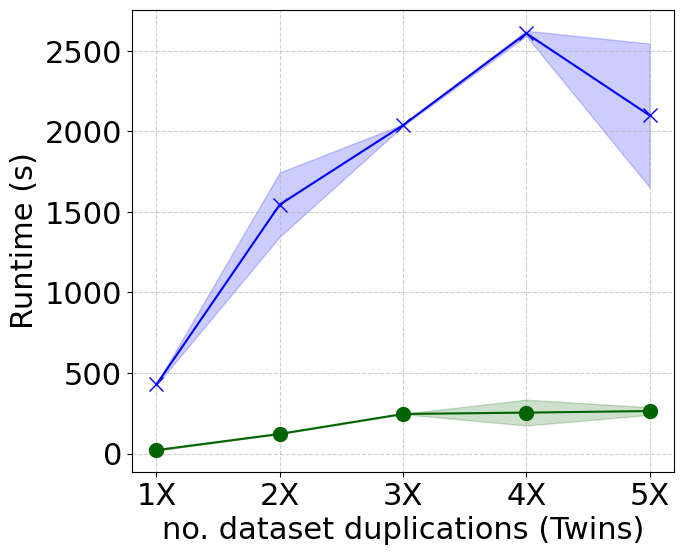

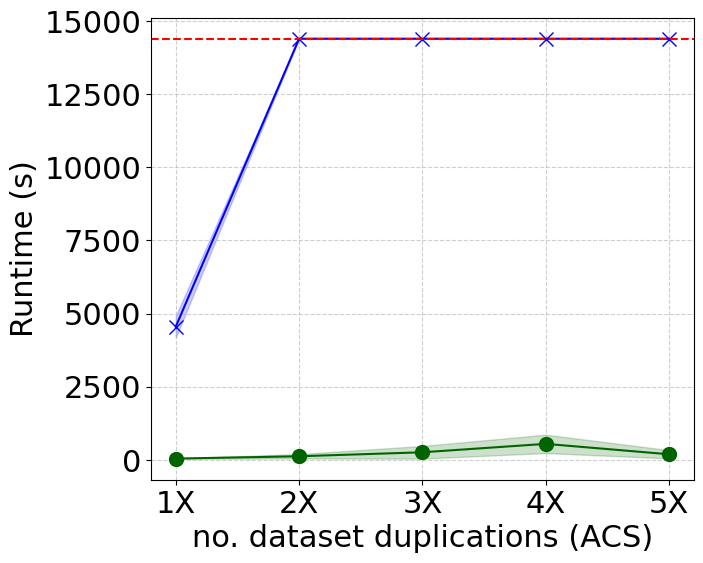

In [18]:
# X values
# -------------------------
x_num_duplications= [1, 2, 3, 4, 5]

# -------------------------
# Y values — NOW list of runs per x
# Put None if no data
# -------------------------

y_runtime_prune_twins =   [[424.6778452396393, 428.6638269424439, 433.5032889842987],
  [1689.7834050655365, 1682.8247287273407, 1263.5632545948029],
  [2032.1498601436613, 2044.243327856064, 2038.0514986515043],
  [2631.06493806839, 2598.1704008579254, 2595.102826833725],
  [1776.831531047821, 1789.8296110630035, 2729.374207496643]]

y_runtime_probe_twins =   [[19.025, 19.025, 26.767],
  [121.727, 122.044, 122.732],
  [244.526, 247.077, 246.235],
  [310.821, 141.378, 311.287],
  [232.877, 270.006, 289.921]]

y_runtime_prune_acs = [[4759.996359109879, 4873.06441617012, 4035.017411231994],
  [TIMEOUT_VAL, TIMEOUT_VAL, TIMEOUT_VAL],
  [TIMEOUT_VAL, TIMEOUT_VAL, TIMEOUT_VAL],
  [TIMEOUT_VAL, TIMEOUT_VAL, TIMEOUT_VAL],
  [TIMEOUT_VAL, TIMEOUT_VAL, TIMEOUT_VAL]]

y_runtime_probe_acs =  [[36.441, 36.811, 46.104],
  [87.551, 46.957, 223.141],
  [133.655, 73.257, 560.129],
  [928.35, 543.826, 157.675],
  [63.715, 113.167, 386.154],
  [545.21, 76.785, 258.988],
  [648.227, 635.631, 162.691],
  [263.415, 131.207, 132.95],
  [1109.585, 281.242, 280.736],
  [175.134, 175.688, 351.447]]

# -------------------------
# Plotting
# -------------------------

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots() #1, 2, figsize=(12, 5))
fig1.set_figheight(doublefig_height)
fig1.set_figwidth(doublefig_width)
fig2.set_figheight(doublefig_height)
fig2.set_figwidth(doublefig_width)

# ---- Twins ----
line1 = plot_with_std(ax1, x_num_duplications, y_runtime_prune_twins, prune_color, prune_marker, "TAPS-OE")
plot_with_std(ax1, x_num_duplications, y_runtime_probe_twins, probe_color, probe_marker)

# ax1.set_xticks(np.arange(0, 52, 6))
ax1.set_xlabel("no. dataset duplications (Twins)")
ax1.grid(True, linestyle='--', alpha=0.6)

# ---- ACS ----
plot_with_std(ax2, x_num_duplications, y_runtime_prune_acs, prune_color, prune_marker)
line2 = plot_with_std(ax2, x_num_duplications, y_runtime_probe_acs, probe_color, probe_marker, "TAPS-Probe")

ax2.set_xlabel("no. dataset duplications (ACS)")
# ax2.set_xticks(np.arange(0, 8, 1))
ax2.grid(True, linestyle='--', alpha=0.6)

# ax1.axhline(y=TIMEOUT_VAL, color='red', linestyle='--', linewidth=1.5)
ax2.axhline(y=TIMEOUT_VAL, color=timeout_color, linestyle='--', linewidth=1.5)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax1.set_xticks([1, 2, 3, 4, 5], ['1X', '2X', '3X', '4X', '5X'])
ax2.set_xticks([1, 2, 3, 4, 5], ['1X', '2X', '3X', '4X', '5X'])
# ---- Shared labels ----
# fig.text(0.04, 0.5, 'Run Time - sec', va='center', rotation='vertical', fontsize=FONT_SIZE)
# fig.text(0.5, 0.04, 'number of dataset duplications', ha='center', fontsize=FONT_SIZE)

ax1.set_ylabel('Runtime (s)')
ax2.set_ylabel('Runtime (s)')


# fig.legend(
#     handles=[line1, line2],
#     loc='lower center',
#     bbox_to_anchor=(0.1, -0.05),
#     frameon=False
# )

# plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.subplots_adjust(left=0.15, wspace=0.3)

fig1.savefig(f'twins-time-vs-duplication.pdf', bbox_inches="tight", dpi=600)
fig2.savefig(f'acs-time-vs-duplication.pdf', bbox_inches="tight", dpi=600)

time VS distance from target ATE

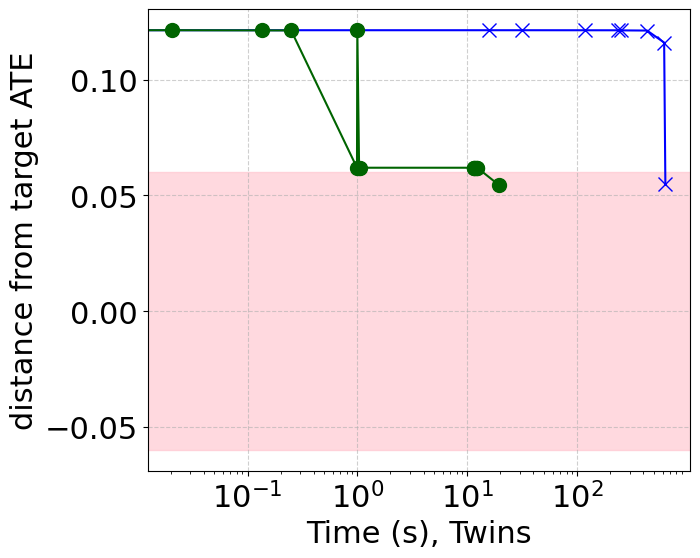

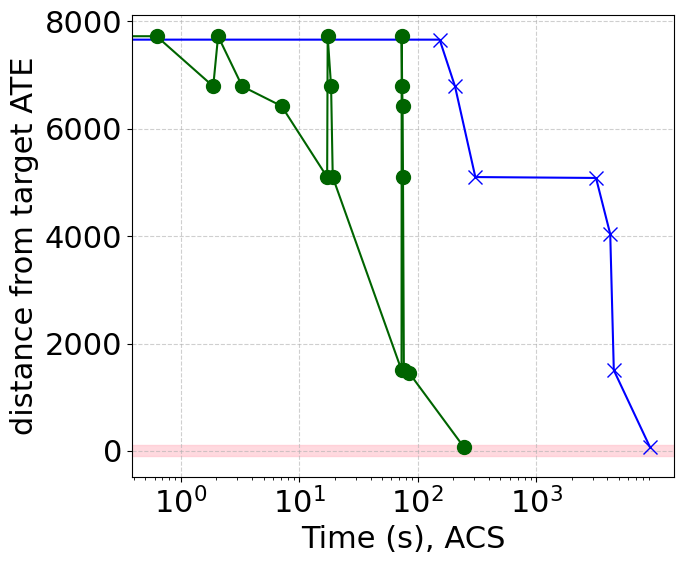

In [19]:
twins_ate_dis_time_prune_list =[(np.float64(0.12132348777051426), 0), (np.float64(0.12132348770723028), 15.658704042434692), (np.float64(0.12132348728793768), 31.281686544418335), (np.float64(0.12130671836147253), 117.04712462425232), (np.float64(0.12129707215436057), 237.65368127822876), (np.float64(0.12125531841868385), 251.95313787460327), (np.float64(0.12118185753686686), 432.71444177627563), (np.float64(0.1159950997287316), 618.9491546154022), (0.055, 635)]
twins_ate_dis_time_probe_list = [(np.float64(0.12132348782713157), 0), (np.float64(0.12132348782713157), 0.020627737045288086), (np.float64(0.12125531867061787), 0.13587045669555664), (np.float64(0.12123102426587895), 0.24935102462768555), (np.float64(0.061959381502116266), 0.9913806915283203), (np.float64(0.12132348782713157), 0.9984016418457031), (np.float64(0.061959381502116266), 1.0364272594451904), (np.float64(0.061958382701169774), 1.0572199821472168), (np.float64(0.061953924508620035), 11.526545763015747), (np.float64(0.06194867512548142), 11.542418479919434), (np.float64(0.0619245666649631), 11.621618747711182), (np.float64(0.06192110575018659), 12.115617990493774), (np.float64(0.061920980318480354), 12.17887806892395), (np.float64(0.06188308460731291), 12.376540660858154), (np.float64(0.0546156546459371), 19.260095357894897)]
acs_ate_dis_time_prune_list =  [(np.float64(7725.566795137067), 0), (np.float64(7661.720210694586), 153.2955663204193), (np.float64(6791.890643120725), 206.61131858825684), (np.float64(5101.413638092308), 306.8622872829437), (np.float64(5084.82584249681), 3204.754827976227), (np.float64(4039.245641980253), 4224.607976198196), (np.float64(1503.3346607778603), 4529.338568687439), (79, 9108)]#[(abs(16500 - ate), time) for ate, time in acs_ate_time_prune_list]
acs_ate_dis_time_probe_list = [(np.float64(7725.566795137067), 0), (np.float64(7725.566795137067), 0.6242222785949707), (np.float64(6791.890643120725), 1.8780333995819092), (np.float64(7725.566795137067), 2.0648982524871826), (np.float64(6791.890643120725), 3.301421880722046), (np.float64(6423.780526559314), 7.092268705368042), (np.float64(5101.413638092308), 17.205387830734253), (np.float64(7725.566795137067), 17.385295391082764), (np.float64(6791.890643120725), 18.574917554855347), (np.float64(5101.413638092308), 19.182234287261963), (np.float64(1503.3346607778603), 73.07257747650146), (np.float64(7725.566795137067), 73.26823782920837), (np.float64(6791.890643120725), 73.91863799095154), (np.float64(6423.780526559314), 74.56803011894226), (np.float64(5101.413638092308), 75.16196179389954), (np.float64(1503.3346607778603), 76.44815278053284), (np.float64(1453.2059266937213), 84.6779317855835), (np.float64(78.24350729365688), 243.97971153259277)]


y_ATE_twins_prune, x_time_twins_prune = zip(*twins_ate_dis_time_prune_list)
y_ATE_twins_probe, x_time_twins_probe = zip(*twins_ate_dis_time_probe_list)
y_ATE_acs_prune, x_time_acs_prune = zip(*acs_ate_dis_time_prune_list)
y_ATE_acs_probe, x_time_acs_probe = zip(*acs_ate_dis_time_probe_list)


fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots() #1, 2, figsize=(12, 5))
fig1.set_figheight(doublefig_height)
fig1.set_figwidth(doublefig_width)
fig2.set_figheight(doublefig_height)
fig2.set_figwidth(doublefig_width)

line1, = ax1.plot(x_time_twins_prune, y_ATE_twins_prune, color=prune_color, marker=prune_marker, ms=MARKER_SIZE, label='TAPS-OE')
line2, = ax1.plot(x_time_twins_probe, y_ATE_twins_probe, color=probe_color, marker=probe_marker, ms=MARKER_SIZE, label='TAPS-Probe')

ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlabel("Time (s), Twins")
ax1.set_xscale('log')
ax1.set_xticks([0.1, 1, 10,100])
# ax1.axhline(y=0.06, color='red', linestyle='--', linewidth=1.5)
# ax1.axhline(y=-0.06, color='red', linestyle='--', linewidth=1.5)

line3, = ax2.plot(x_time_acs_prune, y_ATE_acs_prune, color=prune_color, marker=prune_marker, ms=MARKER_SIZE, label='ACS TAPS-OE')
line4, = ax2.plot(x_time_acs_probe, y_ATE_acs_probe, color=probe_color, marker=probe_marker, ms=MARKER_SIZE, label='ACS TAPS-Probe')

ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xlabel("Time (s), ACS")
ax2.set_xscale('log')
ax2.set_xticks([1, 10,100, 1000])
# ax2.axhline(y=100, color='red', linestyle='--', linewidth=1.5)
# ax2.axhline(y=-100, color='red', linestyle='--', linewidth=1.5)

# print(ax1.get_xlim())

xlim1 = ax1.get_xlim()
xlim2 = ax2.get_xlim()
ax1.fill_between([0,10000],[0.06,0.06],[-0.06,-0.06], alpha=0.6, zorder=-1, color=ate_range_color)
ax2.fill_between([0,100000],[-100,-100],[100,100], alpha=0.6, zorder=-1, color=ate_range_color)
ax1.set_xlim(xlim1)
ax2.set_xlim(xlim2)

# ax1.set_xlim(ax2.get_xlim()[0],max(x_time_twins_prune) + 10)

# fig.text(0.04, 0.5, 'distance from target ATE', va='center', rotation='vertical', fontsize=FONT_SIZE)
ax1.set_ylabel('distance from target ATE')
ax2.set_ylabel('distance from target ATE')
# fig.text(0.5, 0.04, 'time - sec', ha='center', fontsize=FONT_SIZE)
# fig.legend(handles=[line1, line2],
#            loc='lower center',
#            bbox_to_anchor=(0.3, -0.3),
#            ncol=2,
#            frameon=False)
# plt.tight_layout(rect=[0, 0.1, 1, 1])
# plt.subplots_adjust(left=0.15, wspace=0.3)

fig1.savefig(f'twins-time-vs-distance.pdf', bbox_inches="tight", dpi=600)
fig2.savefig(f'acs-time-vs-distance.pdf', bbox_inches="tight", dpi=600)


C:\Users\hila\AppData\Local\Temp\ipykernel_38044\4111679259.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  figlegend.savefig(f'freefloating-legend-target-range.pdf', bbox_inches="tight", dpi=600)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


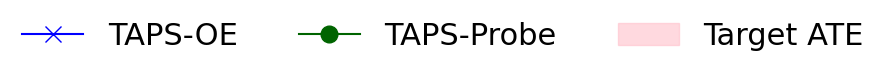

In [52]:
# legend for taregt ATE graphs

def discard_legend_ate():
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    figlegend,ax = plt.subplots()
    figlegend.set_figwidth(10)
    figlegend.set_figheight(0.1)
    figlegend.set_tight_layout(True)
    ax.set_axis_off()
    handles = []
    # for color,label in zip([prune_color,probe_color,'red'],["TAPS-OE","TAPS-Probe",'Timeout']):
    #     handles.append(mpatches.Patch(label=label,color=color,linestyle=))
    handles.append(Line2D([],[],label='TAPS-OE',color=prune_color,linestyle='-',marker=prune_marker,ms=12))
    handles.append(Line2D([],[],label='TAPS-Probe',color=probe_color,linestyle='-',marker=probe_marker,ms=12))
    handles.append(Patch(label='Target ATE',color=ate_range_color, alpha=0.6))
    #figlegend.legend([None,None,None,None],)
    figlegend.legend(handles=handles,ncol=3, frameon=False,loc='center')
    figlegend.savefig(f'freefloating-legend-target-range.pdf', bbox_inches="tight", dpi=600)

discard_legend_ate()

ablation study

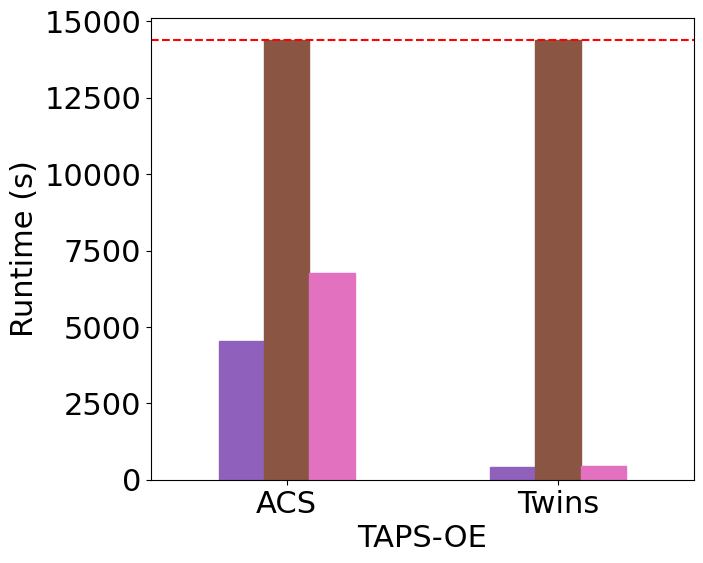

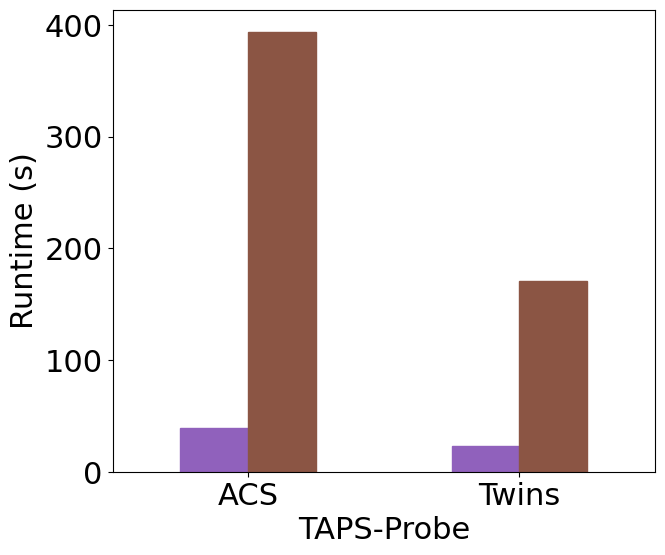

In [31]:
data_prune = {
    'Original': [4555, 428],
    'No Hash': [TIMEOUT_VAL, TIMEOUT_VAL],
    'No Bit Mask': [6770, 436]
}
df_prune = pd.DataFrame(data_prune, index=['ACS', 'Twins'])

data_probe = {
    'Original': [39, 23],
    'No Hash': [394, 171]
}
df_probe = pd.DataFrame(data_probe, index=['ACS', 'Twins'])

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots() #1, 2, figsize=(12, 5))
fig1.set_figheight(doublefig_height)
fig1.set_figwidth(doublefig_width)
fig2.set_figheight(doublefig_height)
fig2.set_figwidth(doublefig_width)

def draw_styled_bar(df, ax, title):
    df.plot(kind='bar', ax=ax, edgecolor='black', color='white', rot=0)

    # patterns = ['', '..', 'oo', '//']
    colors = [(144/255.0, 97/255.0, 188/255.0), (139/255.0, 85/255.0, 68/255.0), (226/255.0, 114/255.0, 191/255.0)]
    bars = ax.patches

    num_categories = len(df.index)
    num_groups = len(df.columns)
    for i, bar in enumerate(bars):
        # bar.set_hatch(patterns[(i // num_categories) + 1])
        bar.set_color(colors[(i // num_categories)])

    # ax.set_title(title)
    ax.set_xlabel(title)
    ax.set_ylabel('Runtime (s)')
    # ax.legend(loc='upper right')
    ax.get_legend().remove()

draw_styled_bar(df_prune, ax1, 'TAPS-OE')
draw_styled_bar(df_probe, ax2, 'TAPS-Probe')

ax1.axhline(y=TIMEOUT_VAL, color=timeout_color, linestyle='--', linewidth=1.5)

fig1.savefig(f'ablation-oe.pdf', bbox_inches="tight", dpi=600)
fig2.savefig(f'ablation-probe.pdf', bbox_inches="tight", dpi=600)

C:\Users\hila\AppData\Local\Temp\ipykernel_38044\3946249940.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  figlegend.savefig(f'freefloating-legend-ablation.pdf', bbox_inches="tight", dpi=600)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


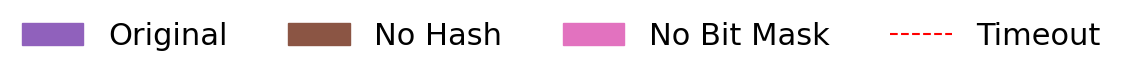

In [51]:
# legend for ablation

def discard_legend_ablation():
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    names = ['Original', 'No Hash', 'No Bit Mask']
    colors = [(144/255.0, 97/255.0, 188/255.0), (139/255.0, 85/255.0, 68/255.0), (226/255.0, 114/255.0, 191/255.0)]
    figlegend,ax = plt.subplots()
    figlegend.set_figwidth(10)
    figlegend.set_figheight(0.1)
    figlegend.set_tight_layout(True)
    ax.set_axis_off()
    handles = []
    for color,label in zip(colors,names):
        handles.append(Patch(label=label,color=color))
    handles.append(Line2D([],[],label='Timeout',color=timeout_color,linestyle='--'))
    
    #figlegend.legend([None,None,None,None],)
    figlegend.legend(handles=handles,ncol=4, frameon=False,loc='center')
    figlegend.savefig(f'freefloating-legend-ablation.pdf', bbox_inches="tight", dpi=600)

discard_legend_ablation()

DML and DR show case

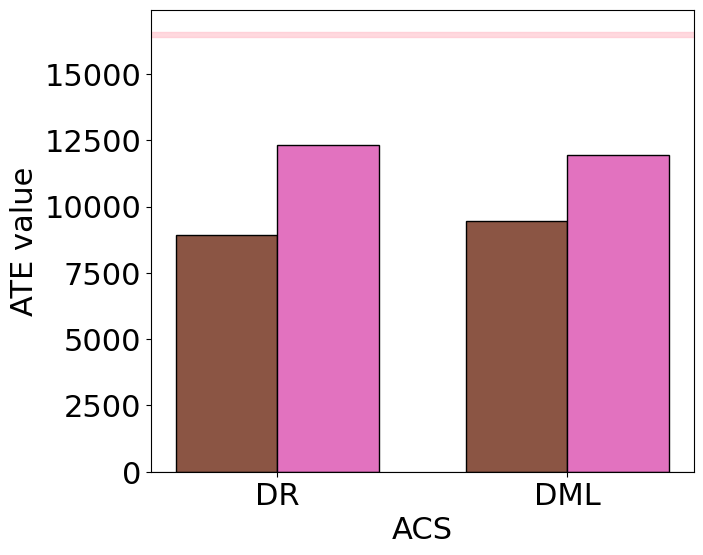

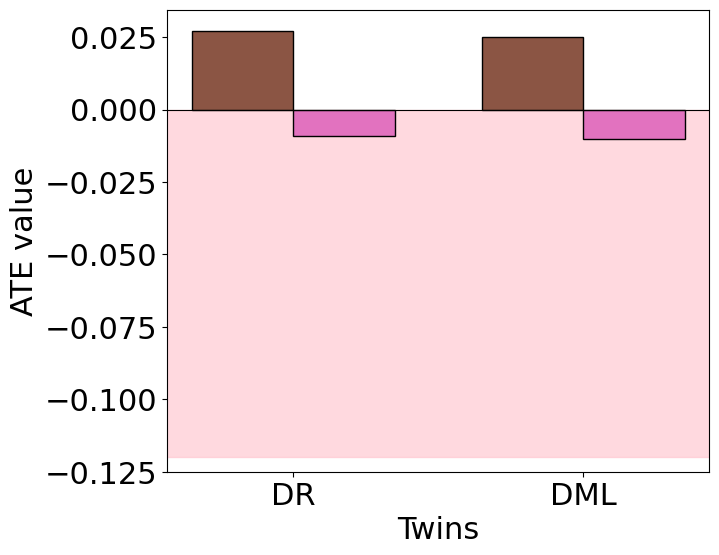

In [46]:
datasets = {
    "ACS": {
        "methods": ["DR", "DML"],
        "initial": [8919.23, 9453.90],
        "post_removal": [12335.92, 11945.98],
        "lines": [16400, 16600]
    },
    "Twins": {
        "methods": ["DR", "DML"],
        "initial": [0.0271, 0.025],
        "post_removal": [-0.009, -0.01],
        "lines": [0, -0.12]
    }
}


fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots() #1, 2, figsize=(12, 5))
fig1.set_figheight(doublefig_height)
fig1.set_figwidth(doublefig_width)
fig2.set_figheight(doublefig_height)
fig2.set_figwidth(doublefig_width)
width = 0.35
x = np.arange(len(datasets["ACS"]["methods"]))

axes= [ax1,ax2]
for i, (ds_name, ds_data) in enumerate(datasets.items()):
    ax = axes[i]

    ax.bar(x - width/2, ds_data["initial"], width, label='Initial ATE',
           color=(139/255.0, 85/255.0, 68/255.0), edgecolor='black')
    ax.bar(x + width/2, ds_data["post_removal"], width, label='ATE after data prep',
           color=(226/255.0, 114/255.0, 191/255.0), edgecolor='black')

    xlim = ax.get_xlim()
    ax.fill_between([xlim[0]-100,xlim[1]+100],[ds_data["lines"][0],ds_data["lines"][0]],[ds_data["lines"][1],ds_data["lines"][1]], alpha=0.6, zorder=-1, color=ate_range_color)
    ax.set_xlim(xlim)
    # for line_val in ds_data["lines"]:
    #     ax.axhline(y=line_val, color='red', linestyle='--', linewidth=1.2, alpha=0.8)

    ax.set_xlabel(ds_name)
    ax.set_ylabel('ATE value')
    ax.set_xticks(x)
    ax.set_xticklabels(ds_data["methods"])
    ax.axhline(0, color='black', linewidth=0.8)

# fig.supylabel('ATE Value', fontsize=FONT_SIZE)
ax2.set_ylim(-0.125,ax2.get_ylim()[1])


fig1.savefig(f'acs-robust-estimator.pdf', bbox_inches="tight", dpi=600)
fig2.savefig(f'twins-robust-estimator.pdf', bbox_inches="tight", dpi=600)


C:\Users\hila\AppData\Local\Temp\ipykernel_38044\1862337102.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  figlegend.savefig(f'freefloating-legend-estimators.pdf', bbox_inches="tight", dpi=600)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
C:\Users\hila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


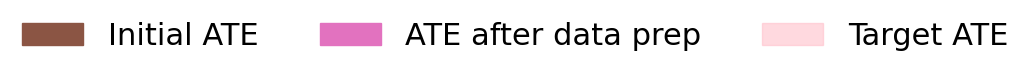

In [50]:
# legend for estimators

def discard_legend_estimator():
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    names = ['Initial ATE','ATE after data prep']
    colors = [(139/255.0, 85/255.0, 68/255.0), (226/255.0, 114/255.0, 191/255.0)]
    figlegend,ax = plt.subplots()
    figlegend.set_figwidth(10)
    figlegend.set_figheight(0.1)
    figlegend.set_tight_layout(True)
    ax.set_axis_off()
    handles = []
    for color,label in zip(colors,names):
        handles.append(Patch(label=label,color=color))
    handles.append(Patch(label='Target ATE',color=ate_range_color, alpha=0.6))
    
    #figlegend.legend([None,None,None,None],)
    figlegend.legend(handles=handles,ncol=3, frameon=False,loc='center')
    figlegend.savefig(f'freefloating-legend-estimators.pdf', bbox_inches="tight", dpi=600)

discard_legend_estimator()